In [160]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "shopping-dataset"

# **Import**

In [161]:
library(psych)
library(dplyr)
library(ggplot2)
library(corrplot)
library(ggcorrplot)

# **1. Data Import & Structure**

In [162]:
data <- read.csv('/kaggle/input/shopping-dataset/Shopping_data.csv')

* **Customer ID: A unique identifier assigned to each customer for tracking and analysis purposes.**

* **Gender: The gender of the customer, which can be categorized as male, female, or non-binary. Understanding the gender distribution of customers can help retailers tailor their marketing strategies and product offerings to different demographic segments.**

* **Income: The income level of the customer, typically categorized into income brackets or ranges. Income data provides insights into the purchasing power of different customer segments and helps retailers determine pricing strategies and product affordability.**

* **Spending Score: A numerical score assigned to each customer based on their spending behavior, often calculated using factors such as purchase frequency, average transaction value, and total expenditure. Spending scores help retailers identify high-value customers who contribute significantly to sales and profitability.** 

* **Age: The age of the customer, usually categorized into age groups or ranges. Age data is essential for understanding the demographic composition of the customer base and tailoring marketing messages and product offerings to different age segments. Additionally, age information can inform decisions related to product design, packaging, and store layout to appeal to specific age demographics.**

In [163]:
str(data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Genre                 : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [164]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CustomerID,1,200,100.50,57.8791845,100.5,100.5000,74.1300,1,200,199,0.00000000,-1.2180144,4.09267639
Genre*,2,200,1.44,0.4976326,1.0,1.4250,0.0000,1,2,1,0.23993606,-1.9521164,0.03518794
Age,3,200,38.85,13.9690073,36.0,37.9375,16.3086,18,70,52,0.47830960,-0.7078460,0.98775798
Annual.Income..k..,4,200,60.56,26.2647212,61.5,59.6375,24.4629,15,137,122,0.31703100,-0.1545620,1.85719624
Spending.Score..1.100.,5,200,50.20,25.8235217,50.0,50.3125,29.6520,1,99,98,-0.04651426,-0.8575446,1.82599873


In [165]:
head(data)

,CustomerID,Genre,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


**Missing Value Check**

In [166]:
colSums(is.na(data))
data <- na.omit(data)

CustomerID                  Genre                    Age 
                     0                      0                      0 
    Annual.Income..k.. Spending.Score..1.100. 
                     0                      0

In [167]:
summary(data)

   CustomerID        Genre                Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

--------------

# **2. Data Transform**

In [168]:
names(data) <- c('ID','Gender','Age','Income','Spending_Score')

In [169]:
data2 <- data # Data for Data Visualization 

In [170]:
# Gender Transform Male -> 1 , Female -> 0

data$Gender <- ifelse(data$Gender == 'Male', 1 , 
                     ifelse(data$Gender == 'Female',0, 2))

data$Rating <- ifelse(data$Spending_Score > 0 & data$Spending_Score <= 35, 'Bad',
                     ifelse(data$Spending_Score > 35 & data$Spending_Score <= 70, 'Normal',
                          ifelse(data$Spending_Score >70 & data$Spending_Score <=100 , 'Good', 'NA')))

data$Rating <- as.factor(data$Rating)
data2$Rating <- data$Rating

**Transform data check**

In [171]:
head(data)

,ID,Gender,Age,Income,Spending_Score,Rating
,<int>,<dbl>,<int>,<int>,<int>,<fct>
1,1,1,19,15,39,Normal
2,2,1,21,15,81,Good
3,3,0,20,16,6,Bad
4,4,0,23,16,77,Good
5,5,0,31,17,40,Normal
6,6,0,22,17,76,Good


-----------

# **3. Data Visualization**

**Use Data 2 for data visualization**

In [172]:
cols <- c('Age','Income','Spending_Score')

**Histogram**

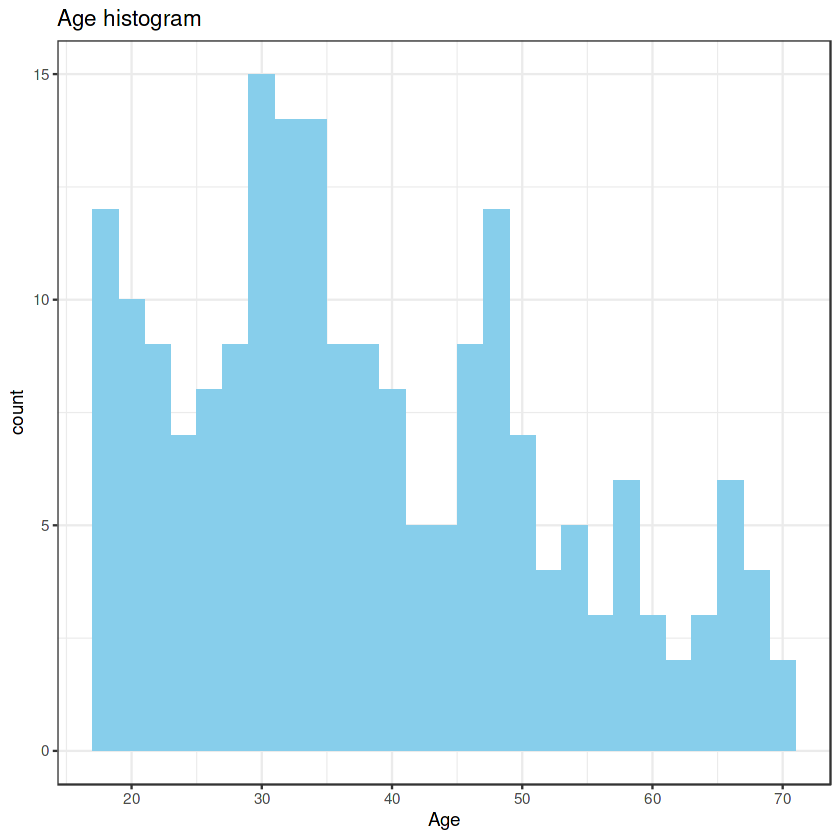

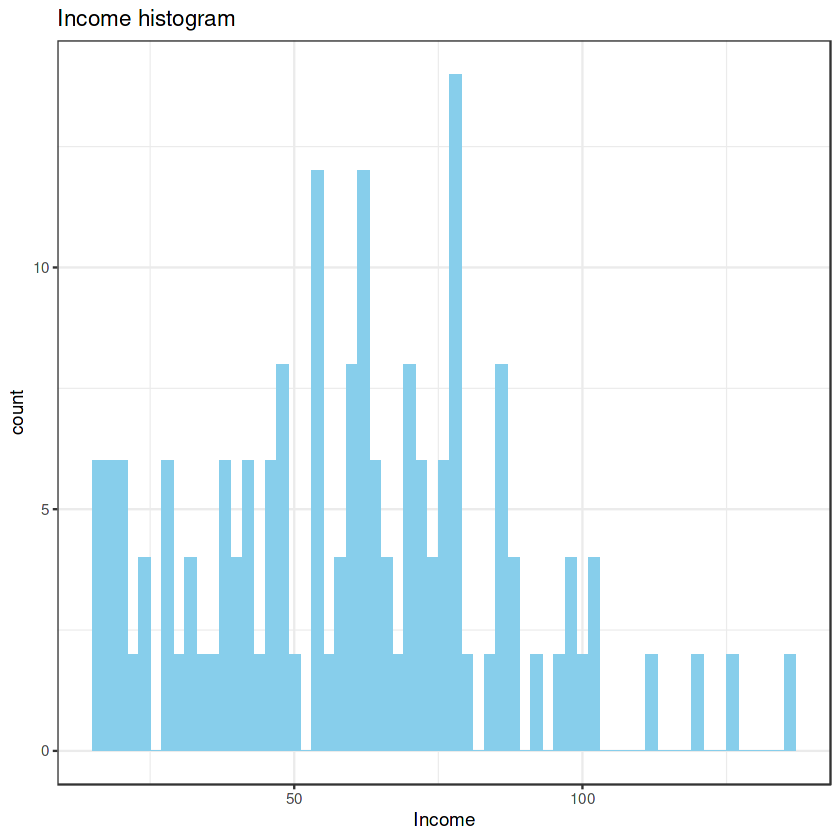

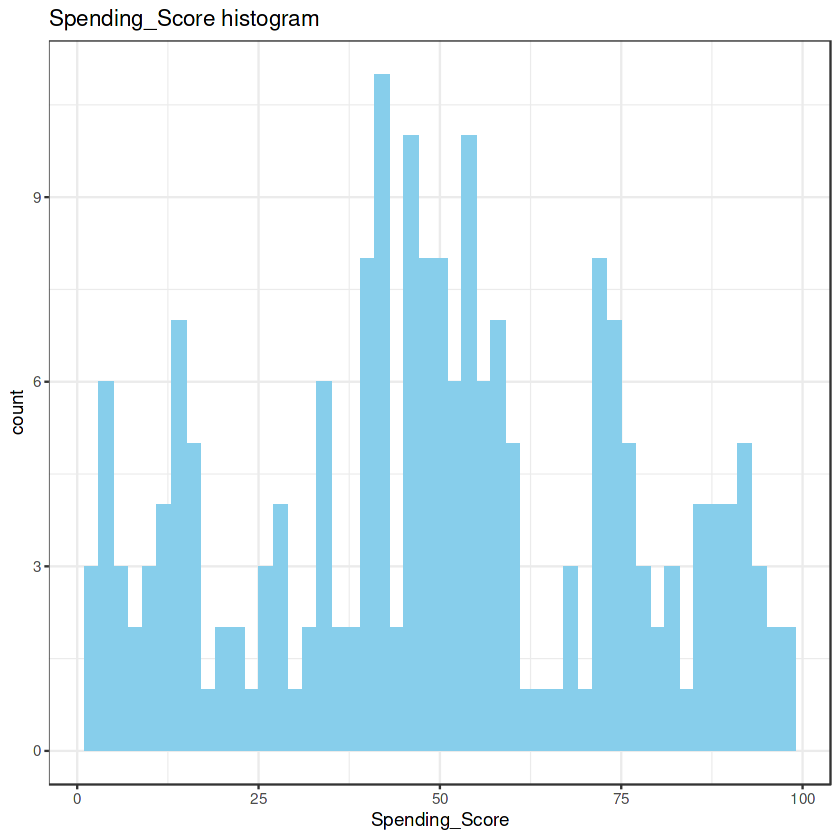

In [229]:
for (i in cols){
    print(ggplot(data2, aes(x= data[,i])) + geom_histogram(fill = 'skyblue', binwidth = 2) + xlab(i) + theme_bw() + ggtitle(paste0(i, ' histogram')))
}

--------------

**Boxplot by Gender**

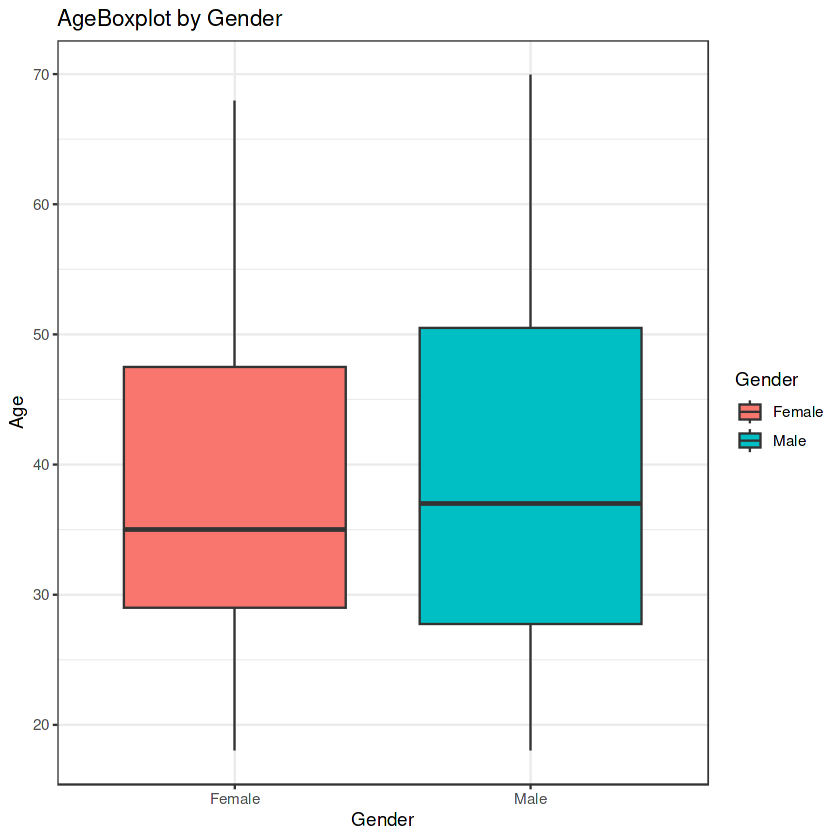

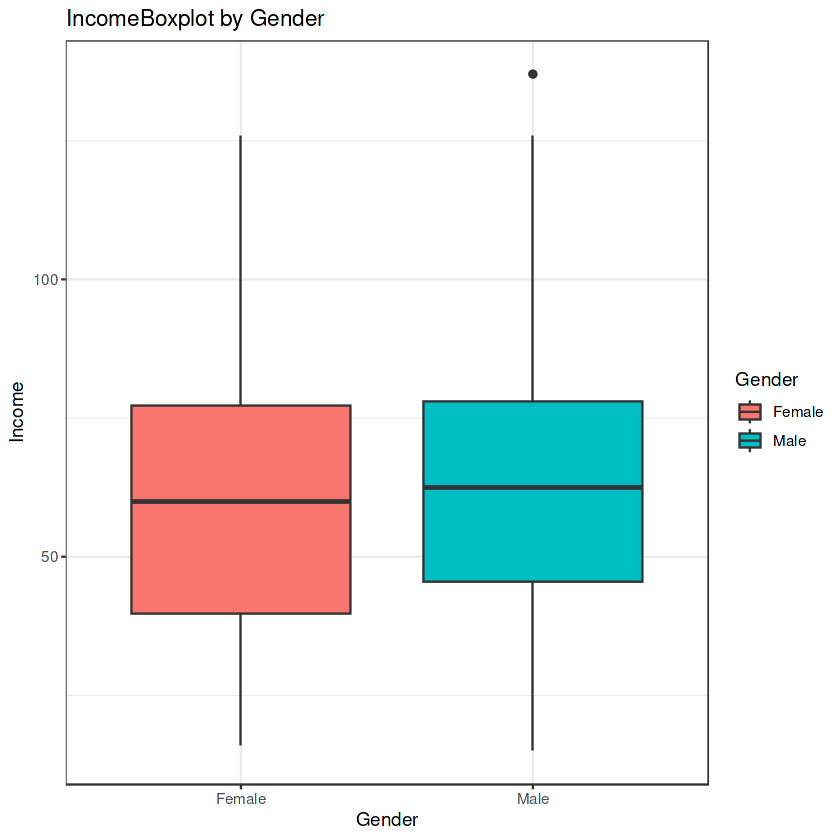

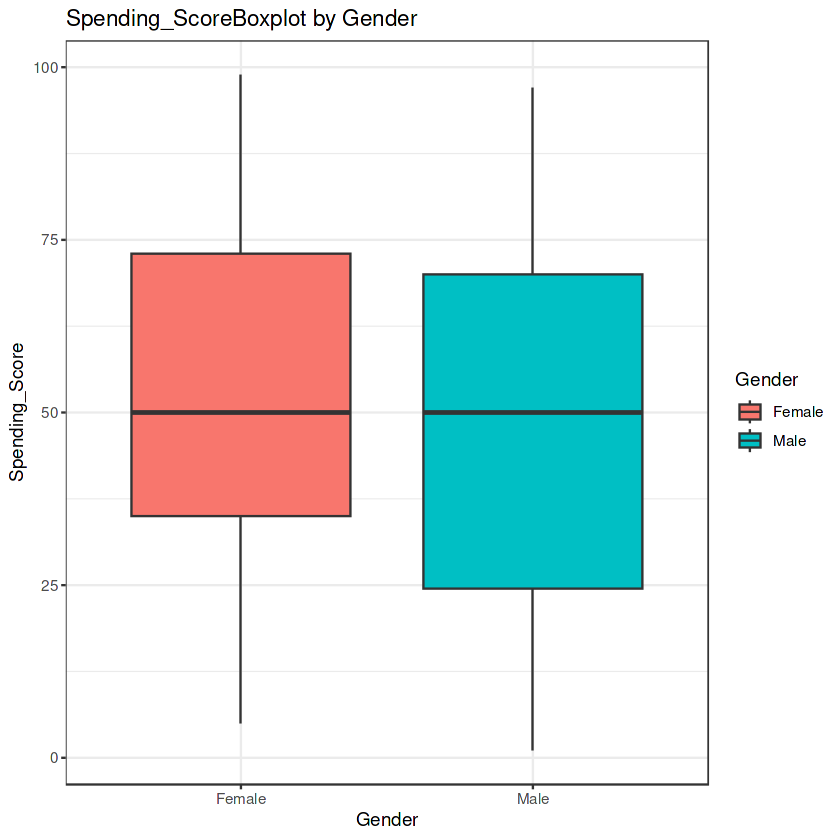

In [174]:
for (i in cols){
    print(ggplot(data2, aes(x= Gender , y= data[,i], fill = Gender)) + geom_boxplot() + ylab(i) + theme_bw() + ggtitle(paste0(i, 'Boxplot by Gender')))
}

**Boxplot by Rating**

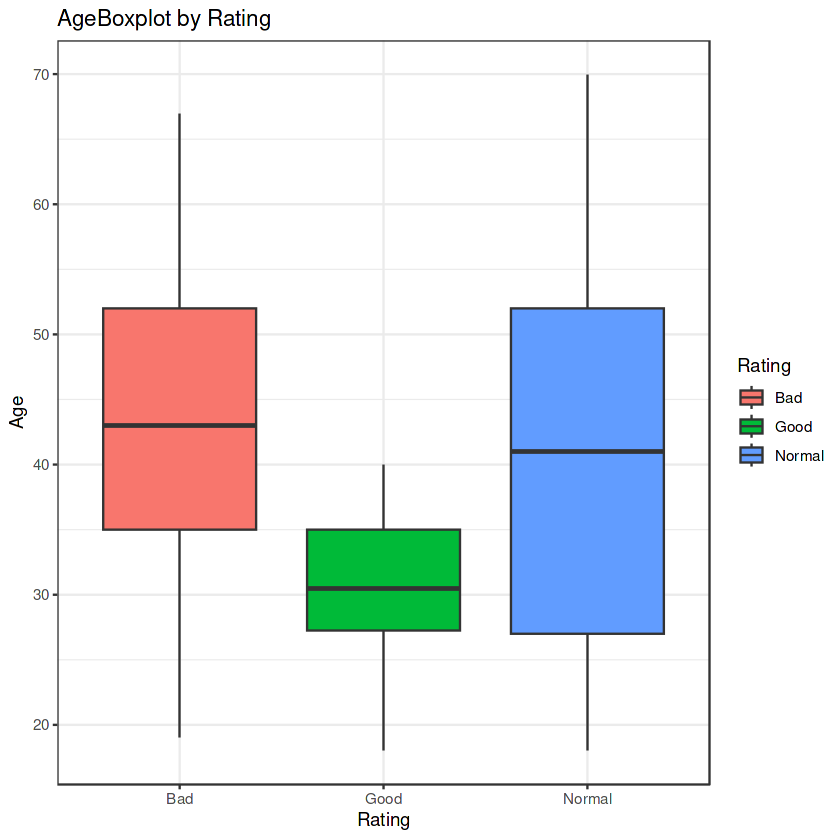

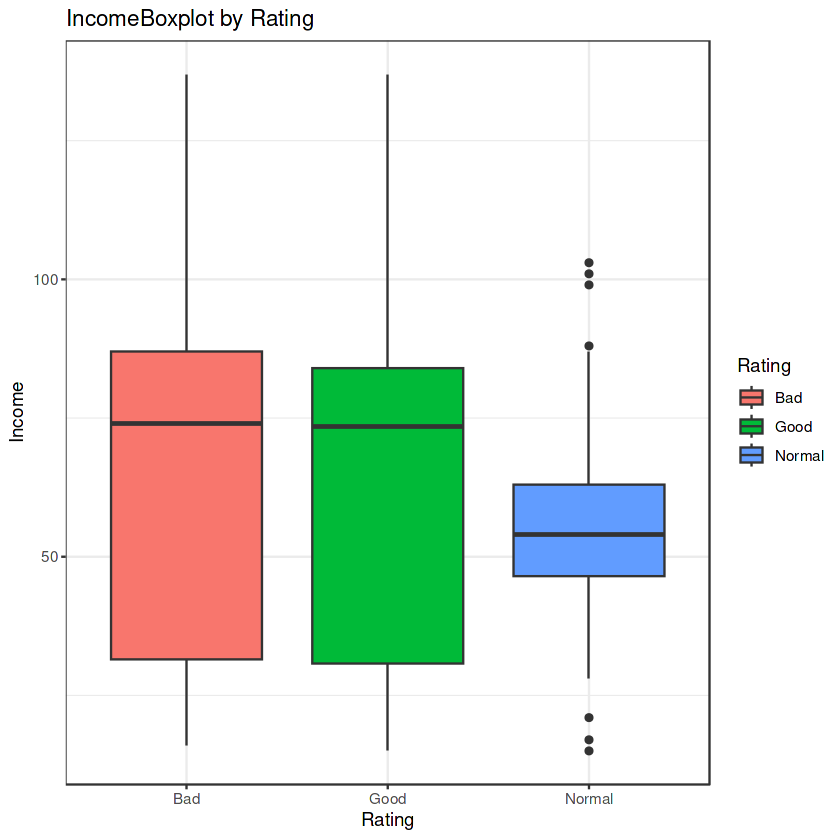

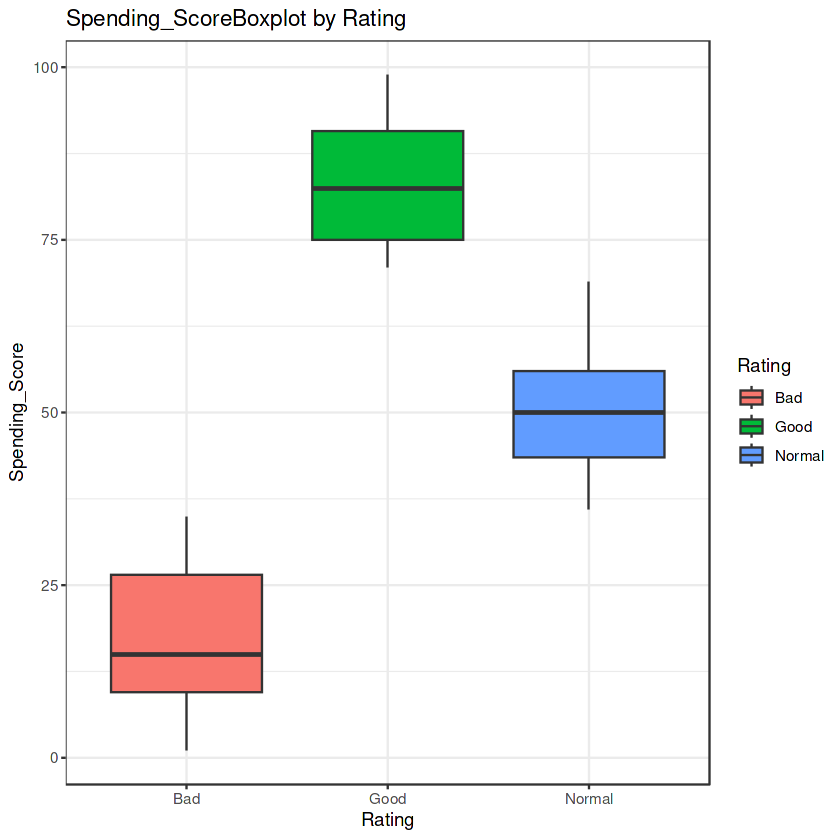

In [251]:
for (i in cols){
    print(ggplot(data2, aes(x= Rating , y= data[,i], fill = Rating)) + geom_boxplot() + ylab(i) + theme_bw() + ggtitle(paste0(i, 'Boxplot by Rating')))
}

-------------------

**Average Income by Gender**

In [176]:
AVG_Gender_Income <- data2 %>% group_by(Gender) %>% summarize(N = n(), avg_income = round(mean(Income , na.rm=T),2))
AVG_Gender_Income

Gender,N,avg_income
<chr>,<int>,<dbl>
Female,112,59.25
Male,88,62.23


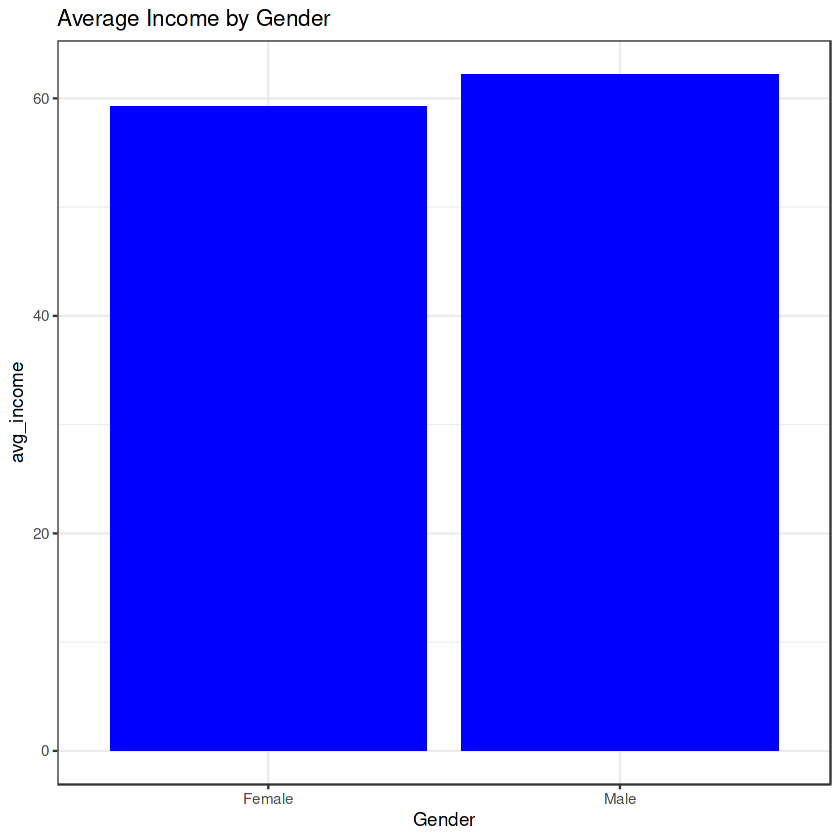

In [233]:
ggplot(AVG_Gender_Income, aes(x= Gender, y= avg_income)) + geom_col(fill = 'blue') + theme_bw() + ggtitle('Average Income by Gender')

**Average SpendingScore by Gender**

In [179]:
AVG_Gender_SpendingScore <- data2 %>% group_by(Gender) %>% summarize(N = n(), avg_SpendingScore = round(mean(Spending_Score, na.rm=T),2))
AVG_Gender_SpendingScore

Gender,N,avg_SpendingScore
<chr>,<int>,<dbl>
Female,112,51.53
Male,88,48.51


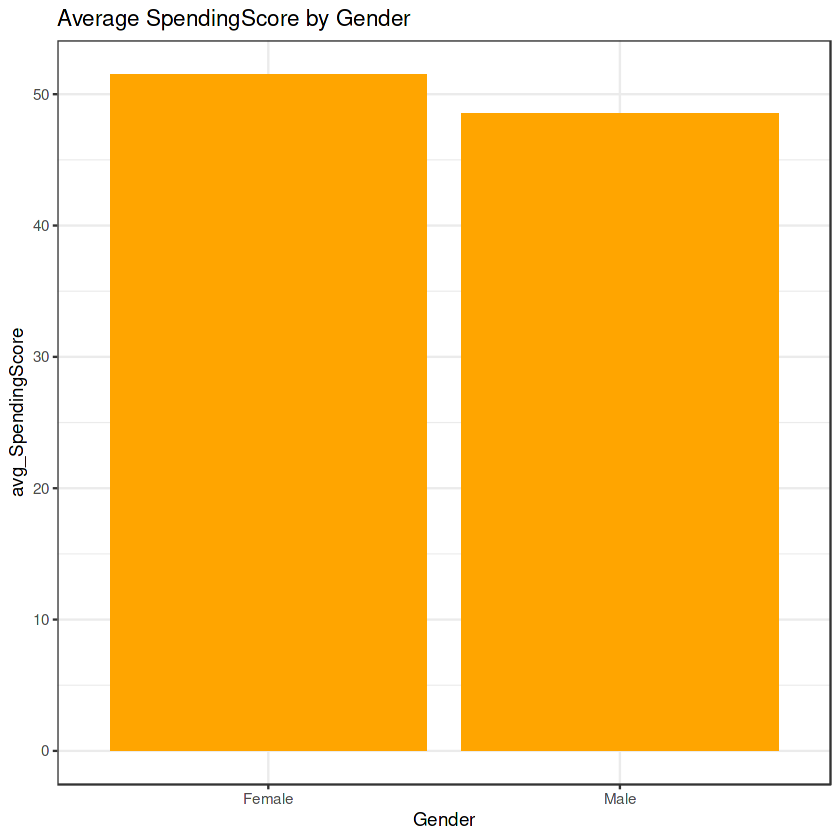

In [180]:
ggplot(AVG_Gender_SpendingScore, aes(x= Gender, y= avg_SpendingScore)) + geom_col(fill = 'orange') + theme_bw() + ggtitle('Average SpendingScore by Gender')

------------------------

**Average Income by Rating**

In [185]:
AVG_Rating_Income <- data2 %>% group_by(Rating) %>% summarize(N = n(), avg_income = round(mean(Income , na.rm=T),2))
AVG_Rating_Income

Rating,N,avg_income
<fct>,<int>,<dbl>
Bad,55,65.24
Good,54,64.33
Normal,91,55.49


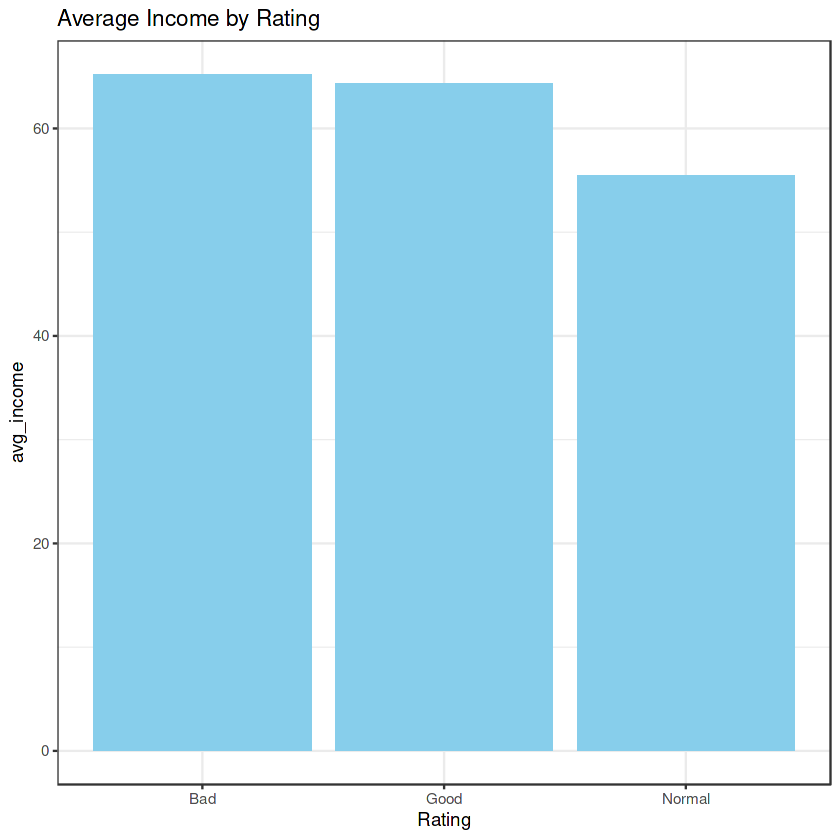

In [191]:
ggplot(AVG_Rating_Income, aes(x= Rating, y= avg_income)) + geom_col(fill = 'skyblue') + theme_bw() + ggtitle('Average Income by Rating')

**Average SpendingScore by Rating**

In [192]:
AVG_Rating_SpendingScore <- data2 %>% group_by(Rating) %>% summarize(N = n(), avg_SpendingScore = round(mean(Spending_Score , na.rm=T),2))
AVG_Rating_SpendingScore

Rating,N,avg_SpendingScore
<fct>,<int>,<dbl>
Bad,55,17.44
Good,54,83.11
Normal,91,50.47


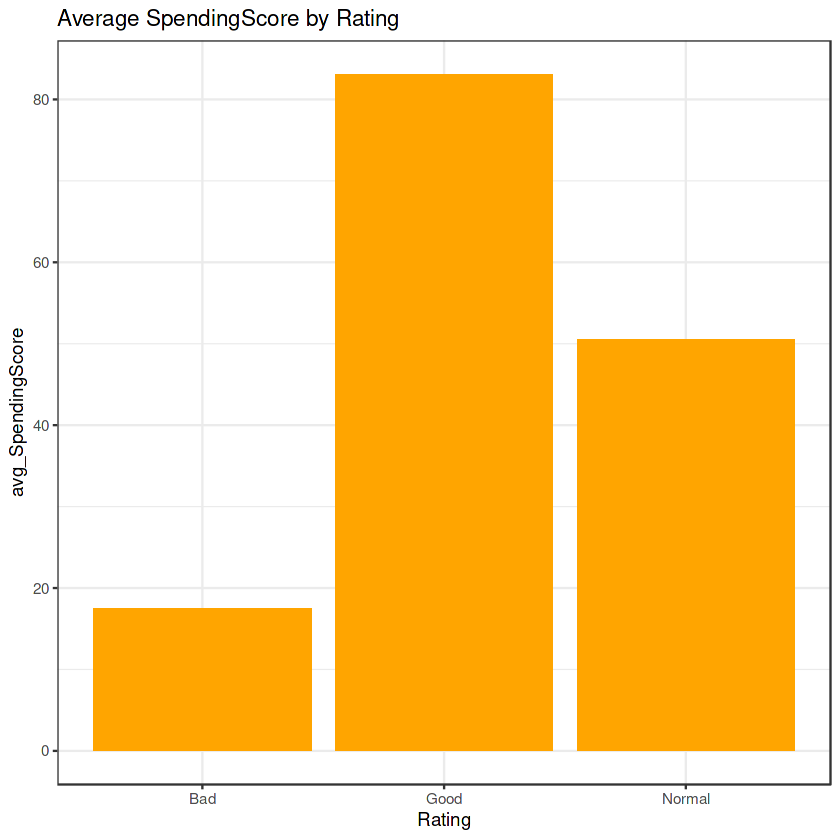

In [193]:
ggplot(AVG_Rating_SpendingScore, aes(x= Rating, y= avg_SpendingScore)) + geom_col(fill = 'orange') + theme_bw() + ggtitle('Average SpendingScore by Rating')

-------------

**Some PointPlot**

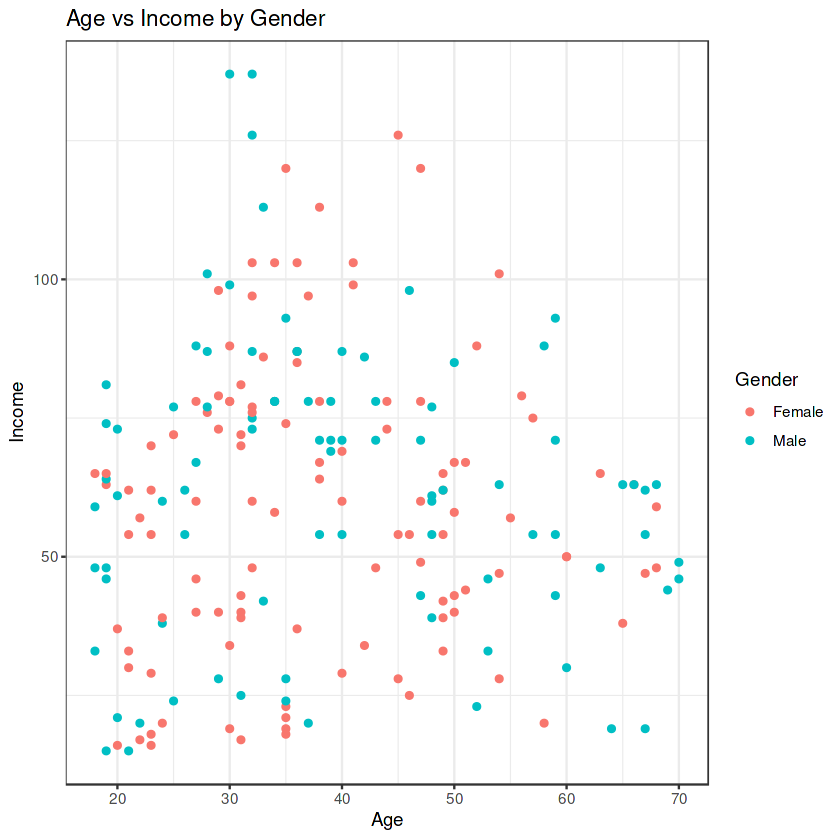

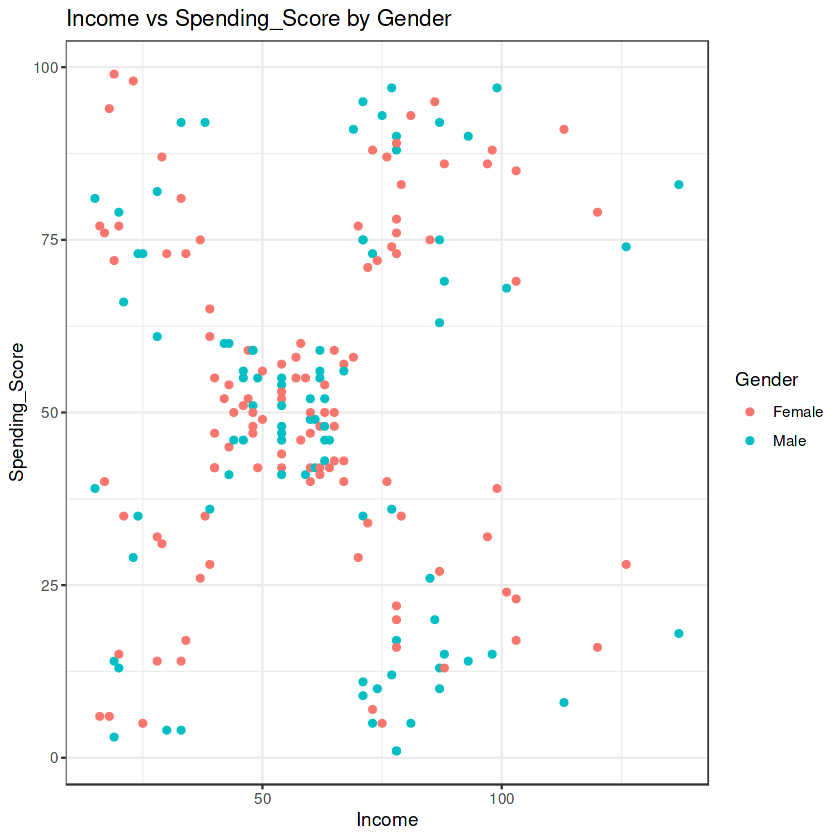

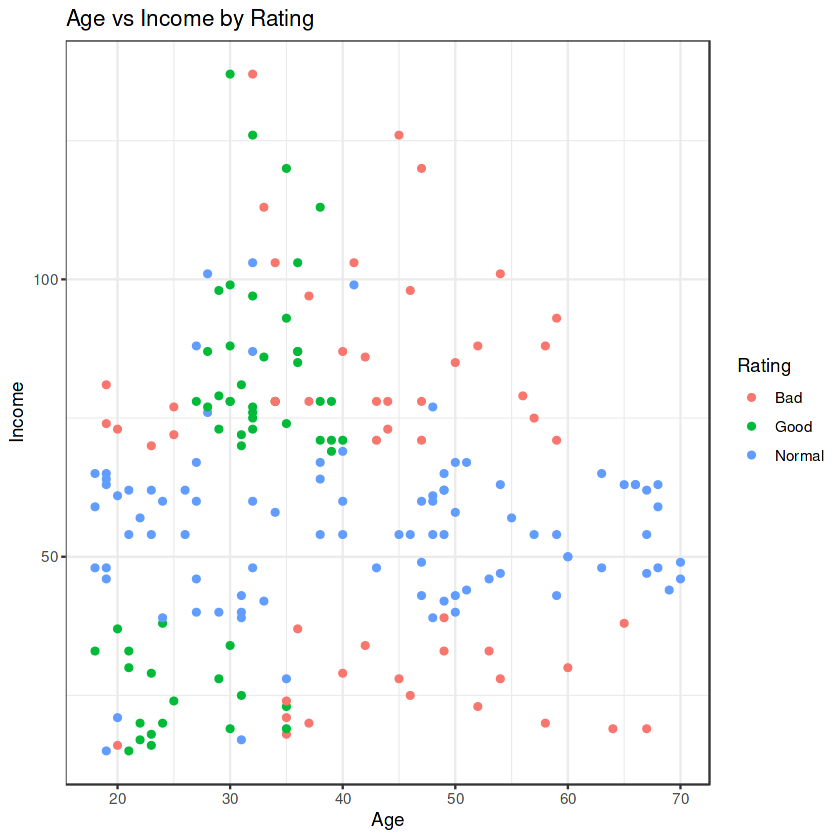

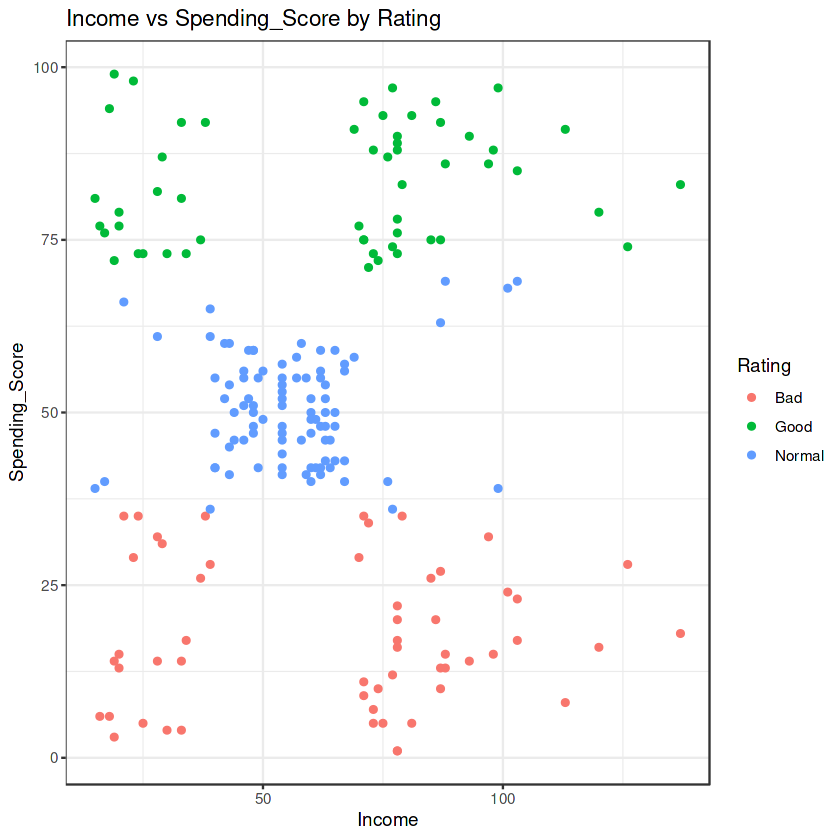

In [252]:
ggplot(data2 , aes(x=Age, y= Income, color = Gender)) + geom_point() + ggtitle('Age vs Income by Gender') + theme_bw()
ggplot(data2 , aes(x=Income, y= Spending_Score, color = Gender)) + geom_point() + ggtitle('Income vs Spending_Score by Gender') + theme_bw()
ggplot(data2 , aes(x=Age, y= Income, color = Rating)) + geom_point() + ggtitle('Age vs Income by Rating') + theme_bw()
ggplot(data2 , aes(x=Income, y= Spending_Score, color = Rating)) + geom_point() + ggtitle('Income vs Spending_Score by Rating') + theme_bw()

----------------

**Thankyou. Please leave your advice in the comments**